In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
%matplotlib inline

In [16]:
N = 10001
Nf = 3
t = np.arange(N, dtype=float)
#random periods between 10-2010 and convert to frequencies
Ts = np.random.rand(Nf)*2000+100
fs = 1./Ts

# random amplitudes
amp = np.random.rand(Nf)*200 + 100
#random phass
phi = np.random.rand(Nf)*2*np.pi
# calculate signal
h = np.zeros(N)
for j in range(len(fs)):
    h += amp[j] * np.sin(2*np.pi*t*fs[j]+phi[j])
# make noisy signal by adding white noise
hn = h + np.random.randn(N)*3*h + np.random.randn(N)*700

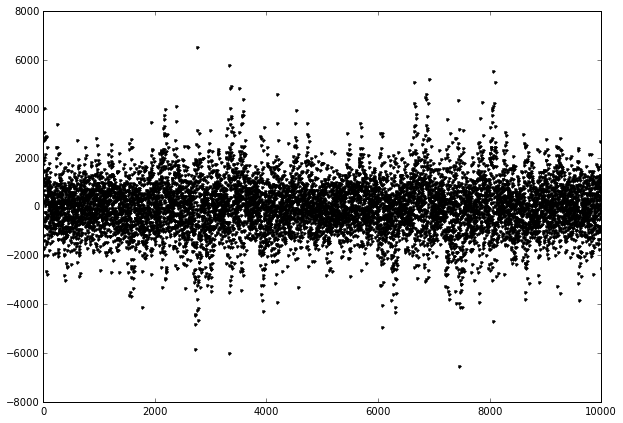

In [17]:
plt.figure(None, (10, 7))
plt.plot(t, hn, 'k.')
plt.show()

In [71]:
Hn = np.fft.fft(hn)
freq = np.fft.fftfreq(N)

In [72]:
len(freq), freq

(10001, array([  0.00000000e+00,   9.99900010e-05,   1.99980002e-04, ...,
         -2.99970003e-04,  -1.99980002e-04,  -9.99900010e-05]))

Frequencies in Hertz. Default 1 second. First freq is 0. 
Called the DC offset because it is a constant. 
cos(0) = 1 and it shifts things.

In [73]:
freq_ind = np.arange(1, N/2, dtype=int)
np.allclose(freq[freq_ind], -1 * freq[-freq_ind]) # Frequencies are mirrored

True

In [74]:
#calculate power spectual density
psd = abs(Hn[freq_ind]**2) + abs(Hn[-freq_ind]**2)

10001 10001 5000 5000 10001


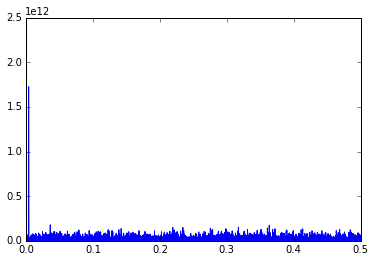

In [75]:
print(len(hn), len(Hn), len(freq_ind), len(psd), len(freq))
plt.plot(freq[freq_ind],psd)
#plt.plot(freq[-freq_ind],psd)
plt.show()

In [90]:
ind = np.where(psd > 1e12)
Hn_cut=np.zeros(len(Hn))
Hn_cut[freq_ind[ind]] = Hn[freq_ind[ind]]
Hn_cut[-freq_ind[ind]] = Hn[-freq_ind[ind]]
hn_cut = np.fft.ifft(Hn_cut)
Hn_cut

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part


array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

/usr/local/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


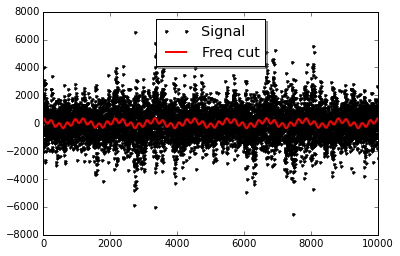

In [83]:
plt.plot(t, hn, 'k.', label='Signal')
plt.plot(t, hn_cut, 'r-', lw=2, label='Freq cut')
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

In [7]:
sigma = 100.
N = 10001
tt = np.arange(-N/2, N/2)
g = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-tt**2/(2*sigma**2))

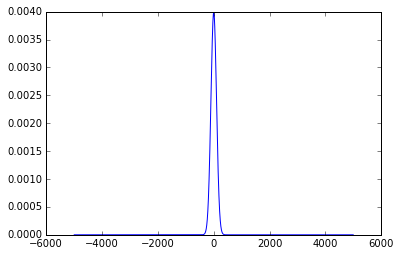

In [8]:
plt.plot(tt, g) # Gaussian Distribution